In [ ]:
#Rachel Collier
#Problem Set 2
#section 1
import pandas
import numpy
import matplotlib
import seaborn
import sklearn
from sklearn import metrics

Pandas: Necessary for data manipulation and analysis, enabling efficient handling of simulated route data.

Numpy: Essential for numerical calculations, particularly in computing distances and conducting mathematical operations for route optimization.

Matplotlib: Crucial for creating data visualizations, facilitating the representation of simulation results.

Seaborn: Enhances visualizations by providing aesthetically pleasing statistical graphics to communicate findings effectively.

sklearn: While not primarily for machine learning, it's valuable for analytical tasks and metrics, aiding in evaluating the quality of optimized routes through the metrics module.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AIProblemSet2Data/train.csv')

In [ ]:
#section 2: 2
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [ ]:
#section 2: 3
columns_to_exclude = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data = data.drop(columns=columns_to_exclude)
print(data)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


#Section 2: 4
Columns like 'PassengerId,' 'Name,' 'Ticket,' and 'Cabin' contain irrelevant or unique information that does not contribute meaningfully to predictive modeling. Removing them simplifies the dataset, reduces dimensionality, and makes it easier to interpret. It also helps in reducing the need for imputing missing values, minimizing noise, and enhancing the performance of predictive models. By excluding these columns, the dataset becomes more focused, efficient, and better suited for extracting meaningful patterns and insights, ultimately improving the quality of data-driven analyses and predictions.

In [ ]:
#section 2: 5
sex_dummies = pd.get_dummies(data, columns=['Sex'], drop_first = True)
print(sex_dummies.head())

   Survived  Pclass   Age  SibSp  Parch     Fare Embarked  Sex_male
0         0       3  22.0      1      0   7.2500        S         1
1         1       1  38.0      1      0  71.2833        C         0
2         1       3  26.0      0      0   7.9250        S         0
3         1       1  35.0      1      0  53.1000        S         0
4         0       3  35.0      0      0   8.0500        S         1


In [ ]:
#section 2: 5
age_dummies = pd.get_dummies(data, columns=['Age'], drop_first = True)
print(age_dummies.head())

   Survived  Pclass     Sex  SibSp  Parch     Fare Embarked  Age_0.67  \
0         0       3    male      1      0   7.2500        S         0   
1         1       1  female      1      0  71.2833        C         0   
2         1       3  female      0      0   7.9250        S         0   
3         1       1  female      1      0  53.1000        S         0   
4         0       3    male      0      0   8.0500        S         0   

   Age_0.75  Age_0.83  ...  Age_62.0  Age_63.0  Age_64.0  Age_65.0  Age_66.0  \
0         0         0  ...         0         0         0         0         0   
1         0         0  ...         0         0         0         0         0   
2         0         0  ...         0         0         0         0         0   
3         0         0  ...         0         0         0         0         0   
4         0         0  ...         0         0         0         0         0   

   Age_70.0  Age_70.5  Age_71.0  Age_74.0  Age_80.0  
0         0         0     

In [ ]:
#section 2: 6
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')
print(data)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0           0       3    male  22.0      1      0   7.2500           0   
1           1       1  female  38.0      1      0  71.2833           1   
2           1       3  female  26.0      0      0   7.9250           0   
3           1       1  female  35.0      1      0  53.1000           0   
4           0       3    male  35.0      0      0   8.0500           0   
..        ...     ...     ...   ...    ...    ...      ...         ...   
886         0       2    male  27.0      0      0  13.0000           0   
887         1       1  female  19.0      0      0  30.0000           0   
888         0       3  female   NaN      1      2  23.4500           0   
889         1       1    male  26.0      0      0  30.0000           1   
890         0       3    male  32.0      0      0   7.7500           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0      

In [ ]:
#section 2: 7
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
print(data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500           0           0   
1         1       1    1  38.0      1      0  71.2833           1           0   
2         1       3    1  26.0      0      0   7.9250           0           0   
3         1       1    1  35.0      1      0  53.1000           0           0   
4         0       3    0  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [ ]:
#section 2: 8
missing_values = data.isnull().sum()
print(missing_values)

Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64


In [ ]:
#section 2: 8
# Replace missing values with the mean (for numeric columns) and mode (for categorical columns)
data['Age'].fillna(data['Age'].mean(), inplace=True)  # Replace missing age values with the mean
data['Sex'].fillna(data['Sex'].mean(), inplace=True)
data['Embarked_C'].fillna(data['Embarked_C'].mode()[0], inplace=True)
data['Embarked_Q'].fillna(data['Embarked_Q'].mode()[0], inplace=True)
data['Embarked_S'].fillna(data['Embarked_S'].mode()[0], inplace=True)

missing_values_after_imputation = data.isnull().sum()
print(missing_values_after_imputation)


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [ ]:
#section 2: 9
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (712, 9) (712,)
Testing data shape (X_test, y_test): (179, 9) (179,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 0.81
Precision: 0.79
Recall: 0.74
Confusion Matrix:


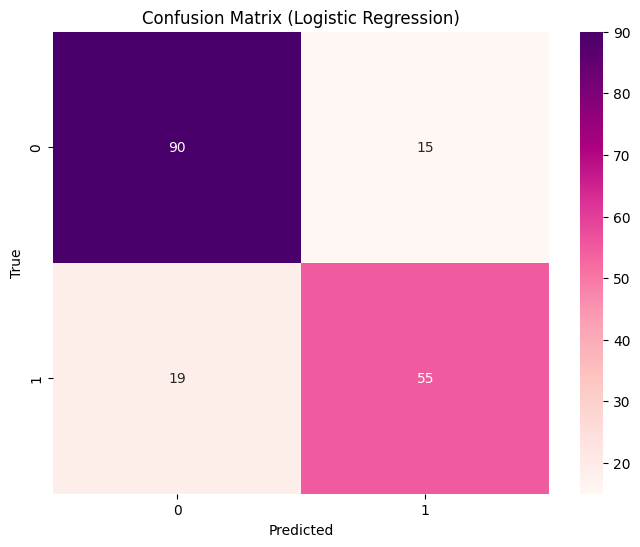

In [ ]:
#section 3: 1 using Logistic Regression with the sklearn library
#section 4: 1 Accuracy, precision, and Recall
#section 4: 2 print the Confusion matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_logistic = logistic_regression_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)

# Display the results
print("Logistic Regression Results:")
print("Accuracy: {:.2f}".format(accuracy_logistic))
print("Precision: {:.2f}".format(precision_logistic))
print("Recall: {:.2f}".format(recall_logistic))
print("Confusion Matrix:")

# Calculate the confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("RdPu", as_cmap=True)
cbar_kws = {
    "orientation": "vertical",
}
sns.heatmap(conf_matrix_logistic, annot=True, fmt="d", cmap=cmap, cbar=True, cbar_kws=cbar_kws)

# Set the labels for the sides
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Logistic Regression)")

# Show the confusion matrix as an image
plt.show()

Multi-Layer Perceptron Results:
Accuracy: 0.80
Precision: 0.78
Recall: 0.73
Confusion Matrix:


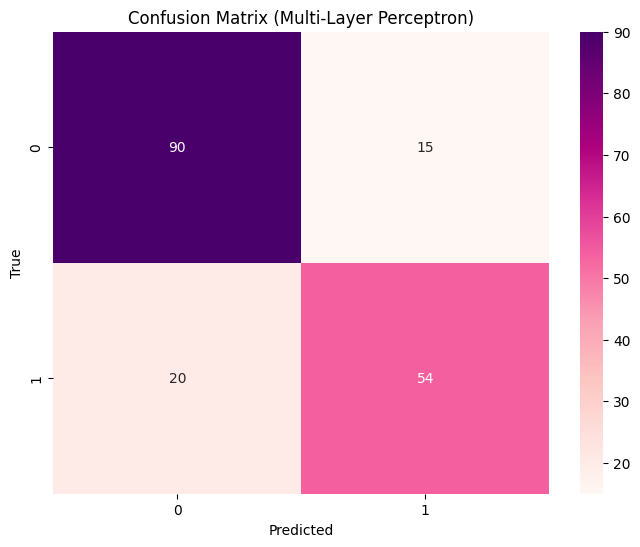

In [ ]:
#section 3: 1 using Multi-Layer Perceptron with the sklearn library
#section 4: 1 Accuracy, precision, and Recall
#section 4: 2 print the Confusion matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)

# Display the results
print("Multi-Layer Perceptron Results:")
print("Accuracy: {:.2f}".format(accuracy_mlp))
print("Precision: {:.2f}".format(precision_mlp))
print("Recall: {:.2f}".format(recall_mlp))
print("Confusion Matrix:")

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("RdPu", as_cmap=True)

cbar_kws = {
    "orientation": "vertical",
}

sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap=cmap, cbar=True, cbar_kws=cbar_kws)

# Set the labels for the sides
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Multi-Layer Perceptron)")

# Show the confusion matrix as an image
plt.show()

Support Vector Machine Results:
Accuracy: 0.66
Precision: 0.76
Recall: 0.26
Confusion Matrix:


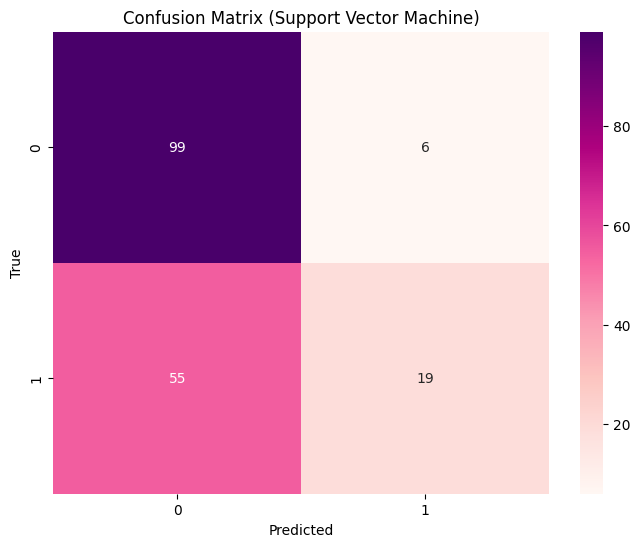

In [ ]:
#section 3: 1 using Support Vector Machine with the sklearn library
#section 4: 1 Accuracy, precision, and Recall
#section 4: 2 print the Confusion matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Display the results
print("Support Vector Machine Results:")
print("Accuracy: {:.2f}".format(accuracy_svm))
print("Precision: {:.2f}".format(precision_svm))
print("Recall: {:.2f}".format(recall_svm))
print("Confusion Matrix:")

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("RdPu", as_cmap=True)

cbar_kws = {
    "orientation": "vertical",
}

sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap=cmap, cbar=True, cbar_kws=cbar_kws)

# Set the labels for the sides
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Support Vector Machine)")

# Show the confusion matrix as an image
plt.show()

KNN Results:
Accuracy: 0.72
Precision: 0.69
Recall: 0.58
Confusion Matrix:


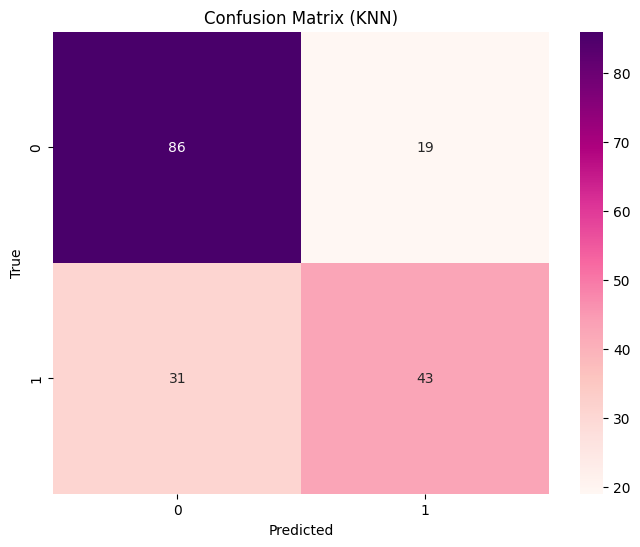

In [ ]:
#section 3: 1 using KNN with the sklearn library
#section 4: 1 Accuracy, precision, and Recall
#section 4: 2 print the Confusion matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# KNN classifier with 7 neighbors for example
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


# Display the results
print("KNN Results:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:")

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
cmap = sns.color_palette("RdPu", as_cmap=True)

cbar_kws = {
    "orientation": "vertical",
}

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap=cmap, cbar=True, cbar_kws=cbar_kws)

# Set the labels for the sides
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (KNN)")

# Show the confusion matrix as an image
plt.show()

#Section 3: 3
Logistic Regression is a linear model used for binary and multiclass classification. It estimates the probability that a given instance belongs to a particular class. The key hyperparameter in the implementation is C, which controls the trade-off between fitting the training data and preventing overfitting.

Multi-Layer Perceptron is a neural network model with multiple layers, capable of handling various machine learning tasks. It has two hidden layers with 100 and 50 neurons. The max_iter parameter is set to 500, and random_state is used to seed random initialization.

Support Vector Machines is a discriminative classifier that aims to find the hyperplane with the largest margin between classes. The implementation uses the 'rbf' kernel by default, with a regularization parameter C set to 1.0.

K-Nearest Neighbors (KNN) is an instance-based, non-parametric model used for classification and regression. It uses 7 nearest neighbors by default and assigns uniform weights to them. KNN makes predictions based on the majority class of its nearest neighbors, making it suitable for various types of data.

In [ ]:
#section 4: 3
# Create a DataFrame to store the results
results = pd.DataFrame({
    "Model Name": ["KNN", "Logistic Regression", "Multi-Layer Perceptron", "Support Vector Machine"],
    "Accuracy": [accuracy, accuracy_logistic, accuracy_mlp, accuracy_svm],
    "Precision": [precision, precision_logistic, precision_mlp, precision_svm],
    "Recall": [recall, recall_logistic, recall_mlp, recall_svm]
})

# Sort the DataFrame by Accuracy in descending order
results = results.sort_values(by="Accuracy", ascending=False)

results = results.reset_index(drop=True)

# Display the table
print("Comparison of Model Performance:")
print(results)


Comparison of Model Performance:
               Model Name  Accuracy  Precision    Recall
0     Logistic Regression  0.810056   0.785714  0.743243
1  Multi-Layer Perceptron  0.804469   0.782609  0.729730
2                     KNN  0.720670   0.693548  0.581081
3  Support Vector Machine  0.659218   0.760000  0.256757


#Section 4: 4
Accuracy measures the overall correctness of the model's predictions. In this comparison, logistic regression has the highest accuracy of  0.810056, followed by multi-layer perceptron 0.804469, knn 0.720670, and support vector machine 0.659218.

Logistic regression and multi-layer perceptron outperformed knn and support vector machine in terms of accuracy. This could be because the dataset might have a predominantly linear or slightly non-linear relationship between features and survival.

KNN and support vector machine achieved lower accuracy values, which could indicate that the choice of hyperparameters, or data preprocessing might not have been optimized for these models.

In [ ]:
#section 3: 2 bonus Logistic Regression
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

In [ ]:
#section 3: 2 bonus Multi-Layer Perceptron attempt
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize the neural network architecture
input_size = X_train.shape[1]
# Number of neurons
hidden_size = 16
output_size = 1

# Initialize weights and biases for the neural network
np.random.seed(0)  # Set a random seed
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.01
num_epochs = 1000

# Make predictions on the test data
hidden_layer_input_test = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output_test = sigmoid(hidden_layer_input_test)
output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + bias_output
output_layer_output_test = sigmoid(output_layer_input_test)
predictions_mlp = (output_layer_output_test >= 0.5).astype(int)


In [ ]:
#section 3: 2 bonus Support Vector Machine attempt
import numpy as np

# Define the hinge loss function
def hinge_loss(X, y, weights, bias, C):
    # Calculate the decision values
    decision = y * (np.dot(X, weights) + bias)
    # Calculate the hinge loss
    loss = 1 - decision
    loss[loss < 0] = 0
    # Calculate the SVM loss
    svm_loss = 0.5 * np.dot(weights, weights) + C * np.sum(loss)
    # Calculate gradients
    gradients = -C * np.dot(X.T, decision < 1) + weights
    return svm_loss, gradients

learning_rate = 0.01
num_epochs = 1000
C = 1.0

weights = np.zeros(X_train.shape[1])
bias = 0

# Training loop
for epoch in range(num_epochs):
    svm_loss, gradients = hinge_loss(X_train, y_train, weights, bias, C)
    weights -= learning_rate * gradients

# Make predictions on the test data
decision_values = y_pred_svm = np.dot(X_test, weights) + bias
predictions_svm = np.sign(decision_values)

In [ ]:
#section 3: 2 bonus KNN
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [ ]:
#section 4: 5
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# MLP with Sigmoid activation
mlp_sigmoid = MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100), max_iter=1000)
mlp_sigmoid.fit(X_train, y_train)

# MLP with Hyperbolic Tangent (tanh) activation
mlp_tanh = MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=1000)
mlp_tanh.fit(X_train, y_train)

# MLP with Rectified Linear Unit (ReLU) activation
mlp_relu = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100), max_iter=1000)
mlp_relu.fit(X_train, y_train)

# Make predictions on the test data for each MLP model
y_pred_sigmoid = mlp_sigmoid.predict(X_test)
y_pred_tanh = mlp_tanh.predict(X_test)
y_pred_relu = mlp_relu.predict(X_test)

# Calculate accuracy for each model
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_tanh = accuracy_score(y_test, y_pred_tanh)
accuracy_relu = accuracy_score(y_test, y_pred_relu)

# Print the accuracy results
print("MLP with Sigmoid Activation Accuracy: {:.2f}".format(accuracy_sigmoid))
print("MLP with Hyperbolic Tangent (tanh) Activation Accuracy: {:.2f}".format(accuracy_tanh))
print("MLP with Rectified Linear Unit (ReLU) Activation Accuracy: {:.2f}".format(accuracy_relu))


MLP with Sigmoid Activation Accuracy: 0.80
MLP with Hyperbolic Tangent (tanh) Activation Accuracy: 0.79
MLP with Rectified Linear Unit (ReLU) Activation Accuracy: 0.80


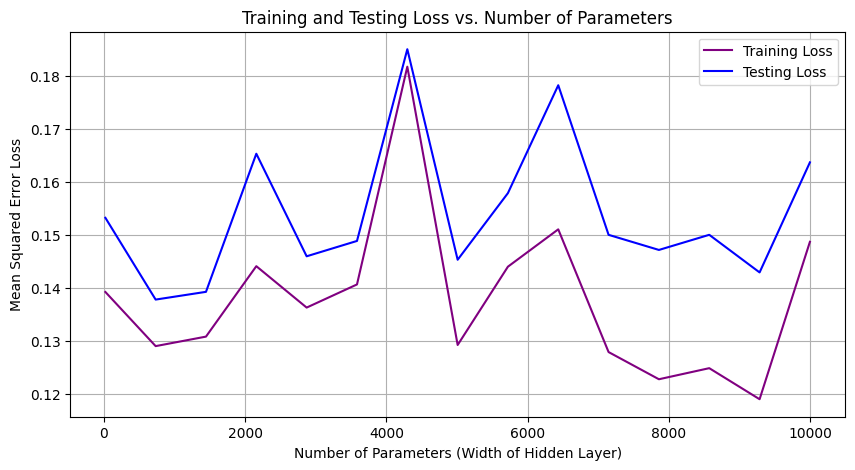

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

widths = np.linspace(20, 10000, 15, dtype=int)
training_loss = []
testing_loss = []

for width in widths:
    # Create an MLP with one hidden layer and ReLU activation
    mlp = MLPRegressor(hidden_layer_sizes=(width,), activation='relu', max_iter=1000)

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    # Make predictions on the training and testing data
    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    # Calculate mean squared error for training and testing
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    # Append the losses to the lists
    training_loss.append(train_loss)
    testing_loss.append(test_loss)

# Plot the training and testing loss against the number of parameters (width)
plt.figure(figsize=(10, 5))
plt.plot(widths, training_loss, label='Training Loss', color='purple')
plt.plot(widths, testing_loss, label='Testing Loss', color='blue')
plt.xlabel('Number of Parameters (Width of Hidden Layer)')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training and Testing Loss vs. Number of Parameters')
plt.legend()
plt.grid(True)
plt.show()